<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/AnberW14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Step 1: Loading Data ---
Generating Asset 1: Class Distribution...


/tmp/ipython-input-507552511.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette='viridis')


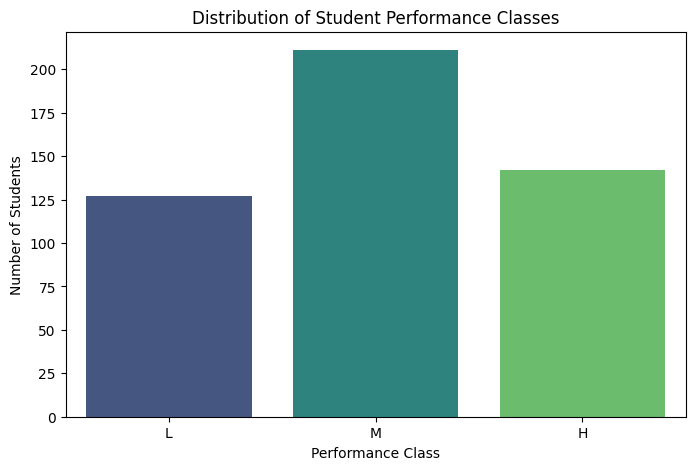

Generating Asset 2: Correlation Matrix...


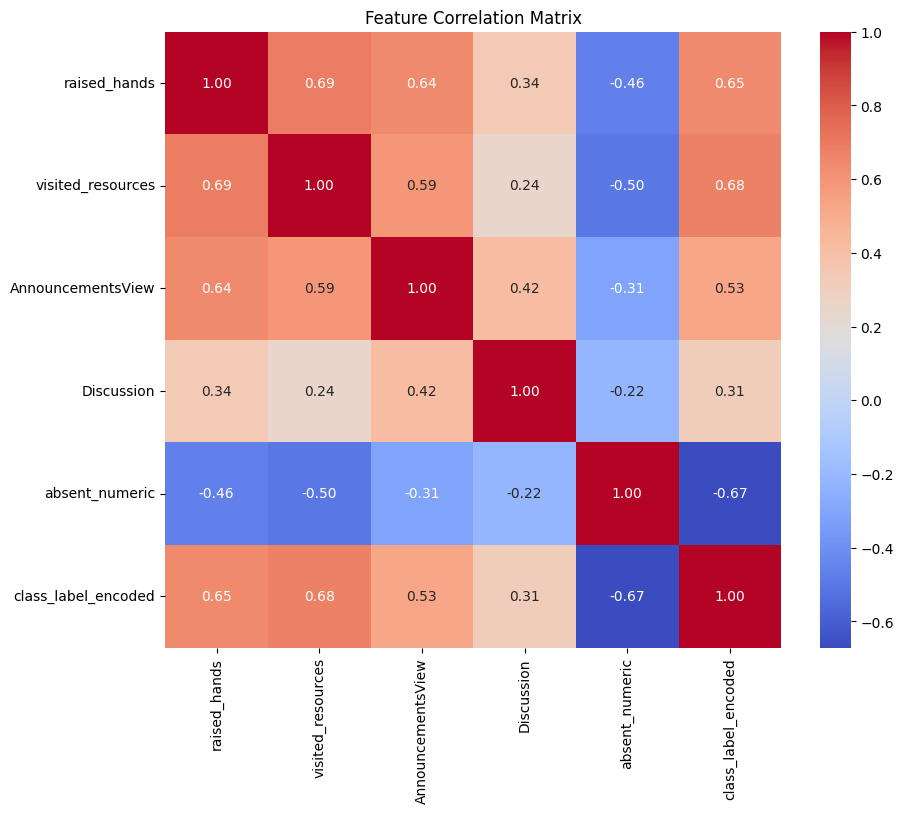

Generating Asset 3: Model Training History...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


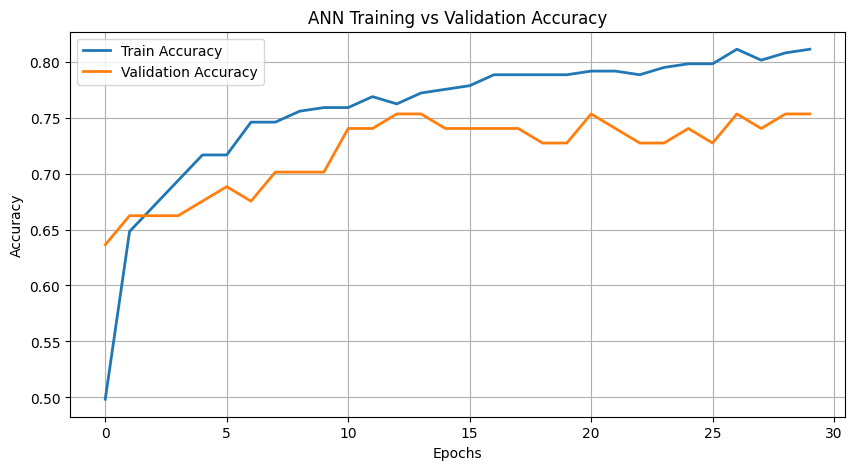

Generating Asset 4: Confusion Matrix...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


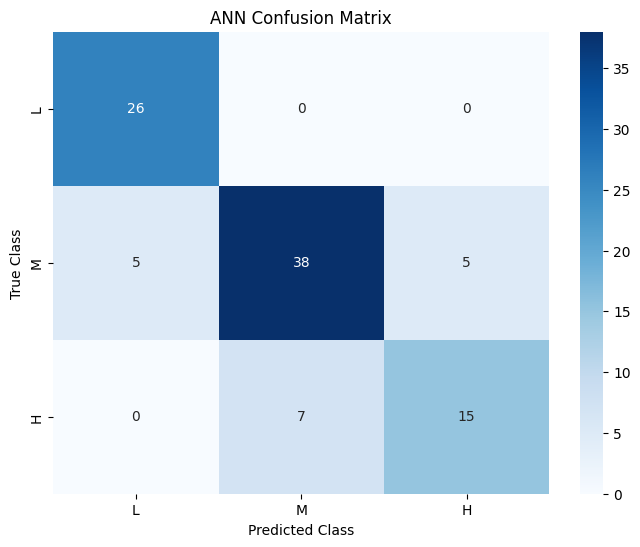


✅ All Assets Generated! Check the 'Files' tab on the left to download the .png files.


In [1]:
# ==========================================
# 📄 Week 14: Final Report Asset Generation
# Student: Anber Aziz (Roll No. 2225165090)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Setup
print("--- Step 1: Loading Data ---")
url = "https://raw.githubusercontent.com/basilatawneh/Students-Academic-Performance-Dataset-xAPI-Edu-Data-/master/xAPI-Edu-Data.csv"
df = pd.read_csv(url)
df.rename(columns={'NationalITy': 'Nationality', 'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources'}, inplace=True)
class_map = {'L': 0, 'M': 1, 'H': 2}
df['class_label_encoded'] = df['Class'].map(class_map)

# --- Asset 1: Class Distribution (Chapter 3) ---
print("Generating Asset 1: Class Distribution...")
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, order=['L', 'M', 'H'], palette='viridis')
plt.title('Distribution of Student Performance Classes')
plt.xlabel('Performance Class')
plt.ylabel('Number of Students')
plt.savefig('Figure_3_1_Class_Distribution.png', dpi=300) # Save as High-Res PNG
plt.show()

# --- Asset 2: Correlation Heatmap (Chapter 3) ---
print("Generating Asset 2: Correlation Matrix...")
features = ['raised_hands', 'visited_resources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']
# Encode Absence for correlation check
df['absent_numeric'] = df['StudentAbsenceDays'].apply(lambda x: 1 if x == 'Above-7' else 0)
corr_cols = ['raised_hands', 'visited_resources', 'AnnouncementsView', 'Discussion', 'absent_numeric', 'class_label_encoded']

plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.savefig('Figure_3_2_Correlation_Matrix.png', dpi=300)
plt.show()

# --- Asset 3: ANN Training History (Chapter 4) ---
print("Generating Asset 3: Model Training History...")
# Quick Train to get history
X = pd.get_dummies(df[features + ['ParentAnsweringSurvey', 'Relation', 'gender']], drop_first=True)
y = df['class_label_encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=0)

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('ANN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Figure_4_1_Training_History.png', dpi=300)
plt.show()

# --- Asset 4: Confusion Matrix (Chapter 4) ---
print("Generating Asset 4: Confusion Matrix...")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['L', 'M', 'H'], yticklabels=['L', 'M', 'H'])
plt.title('ANN Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('Figure_4_2_Confusion_Matrix.png', dpi=300)
plt.show()

print("\n✅ All Assets Generated! Check the 'Files' tab on the left to download the .png files.")